# Garbage Classification

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout
from tensorflow.keras.models  import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from tensorflow.compat.v1 import ConfigProto

from tensorflow.compat.v1 import InteractiveSession



config = ConfigProto()

config.gpu_options.allow_growth = True

session = InteractiveSession(config=config)

In [3]:
tf.__version__

'2.4.0'

In [4]:
import matplotlib.pyplot as plt
def plot_imgs(item_dir, top=10):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

In [5]:
import os
print(os.listdir('./Garbage classification/Garbage classification'))

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [6]:
data_path = './Garbage classification/Garbage classification'

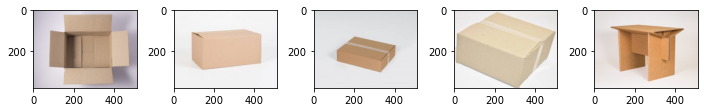

In [7]:
plot_imgs(data_path+'/cardboard')

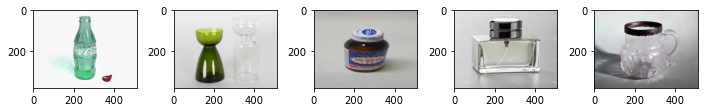

In [8]:
plot_imgs(data_path+'/glass')

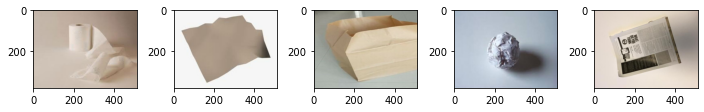

In [9]:
plot_imgs(data_path+'/paper')

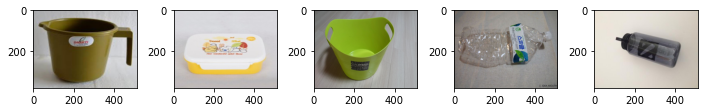

In [10]:
plot_imgs(data_path+'/plastic')

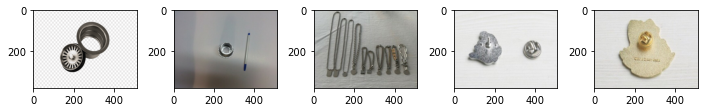

In [11]:
plot_imgs(data_path+'/metal')

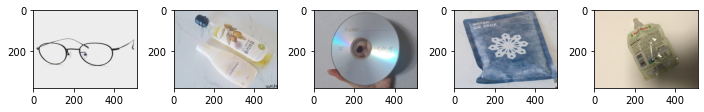

In [12]:
plot_imgs(data_path+'/trash')

## Data Generator

In [13]:
batch_size = 16

In [14]:
train=ImageDataGenerator(
    horizontal_flip=True, 
    vertical_flip=True,
    validation_split=0.1,
    rescale=1./255,
    shear_range = 0.1,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,)

test=ImageDataGenerator(rescale=1./255,validation_split=0.1)

train_generator=train.flow_from_directory(data_path,target_size=(512,384),batch_size=batch_size,class_mode='categorical',subset='training')

test_generator=test.flow_from_directory(data_path,target_size=(512,384),batch_size=batch_size,class_mode='categorical',subset='validation')

Found 2313 images belonging to 6 classes.
Found 255 images belonging to 6 classes.


In [15]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


## Build Model

In [16]:
num_classes = 6

In [17]:
model = Sequential()
   
model.add(Conv2D(32,(3,3), padding='same', input_shape=(512,384,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(rate=0.1))
model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.1))
model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.1))
model.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes,activation='softmax')) # 다중분류

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 512, 384, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 256, 192, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 256, 192, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 192, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 96, 64)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 96, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 96, 64)       3

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train Model

In [19]:
num_epochs = 95
step_size_train=train_generator.n//train_generator.batch_size
step_size_test =test_generator.n//test_generator.batch_size

In [30]:
history = model.fit(train_generator, epochs=num_epochs, steps_per_epoch=step_size_train,validation_data=test_generator,
                    validation_steps=step_size_test)

Epoch 1/95
144/144 [==============================] - 52s 364ms/step - loss: 0.5226 - accuracy: 0.8041 - val_loss: 1.1295 - val_accuracy: 0.6792
Epoch 2/95
144/144 [==============================] - 52s 364ms/step - loss: 0.5047 - accuracy: 0.8176 - val_loss: 1.1875 - val_accuracy: 0.6583
Epoch 3/95
144/144 [==============================] - 52s 362ms/step - loss: 0.4859 - accuracy: 0.8211 - val_loss: 1.2602 - val_accuracy: 0.6667
Epoch 4/95
144/144 [==============================] - 53s 367ms/step - loss: 0.4863 - accuracy: 0.8189 - val_loss: 1.1139 - val_accuracy: 0.6833
Epoch 5/95
144/144 [==============================] - 53s 370ms/step - loss: 0.4866 - accuracy: 0.8193 - val_loss: 1.2711 - val_accuracy: 0.6917
Epoch 6/95
144/144 [==============================] - 53s 370ms/step - loss: 0.5054 - accuracy: 0.8176 - val_loss: 1.1993 - val_accuracy: 0.6792
Epoch 7/95
144/144 [==============================] - 53s 369ms/step - loss: 0.4765 - accuracy: 0.8219 - val_loss: 1.1669 - val_ac

144/144 [==============================] - 54s 375ms/step - loss: 0.3988 - accuracy: 0.8524 - val_loss: 1.0444 - val_accuracy: 0.7458
Epoch 58/95
144/144 [==============================] - 54s 375ms/step - loss: 0.3890 - accuracy: 0.8624 - val_loss: 1.3720 - val_accuracy: 0.6917
Epoch 59/95
144/144 [==============================] - 53s 371ms/step - loss: 0.4099 - accuracy: 0.8511 - val_loss: 1.2886 - val_accuracy: 0.7083
Epoch 60/95
144/144 [==============================] - 54s 374ms/step - loss: 0.3839 - accuracy: 0.8629 - val_loss: 1.3770 - val_accuracy: 0.6875
Epoch 61/95
144/144 [==============================] - 54s 373ms/step - loss: 0.3567 - accuracy: 0.8677 - val_loss: 1.3255 - val_accuracy: 0.6792
Epoch 62/95
144/144 [==============================] - 54s 372ms/step - loss: 0.4164 - accuracy: 0.8428 - val_loss: 1.2908 - val_accuracy: 0.6958
Epoch 63/95
144/144 [==============================] - 54s 372ms/step - loss: 0.4064 - accuracy: 0.8494 - val_loss: 1.2853 - val_accurac

## Model save

In [31]:
model.save('garbage_model95.h5')

In [32]:
Load_model = keras.models.load_model('garbage_model95.h5')

## Evaluate Model

In [33]:
# Evaluate Model
score = Load_model.evaluate_generator(test_generator, steps=step_size_test)
print(score)

[1.4881970882415771, 0.7250000238418579]


## Training History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


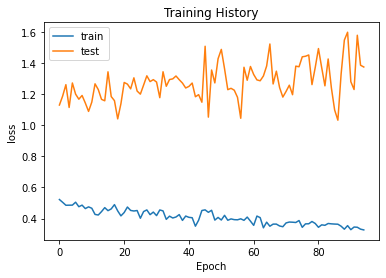

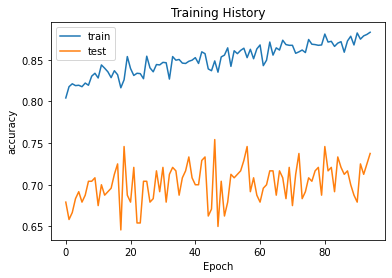

In [34]:
# Show Train History
keys=history.history.keys()
print(keys)

def show_train_history(hisData,train,test): 
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[test])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')

In [35]:
image_path = "./Garbage classification/carmea"

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
testGen = train.flow_from_directory(
    os.path.join(image_path),
    target_size=(512,384),
)

Found 6 images belonging to 1 classes.


In [37]:
predictions = Load_model.predict(testGen)

In [38]:
import numpy as np
from tensorflow.keras.preprocessing.image import array_to_img

cls_index = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

count = 5
print(predictions[count])
print('예측 : ', cls_index[np.argmax(predictions[count])], sep="")

[8.5530934e-05 7.2917908e-01 8.9775532e-02 1.7167069e-01 7.7606486e-03
 1.5285385e-03]
예측 : glass


예측: glass


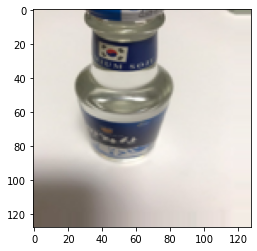

In [40]:
cls_index = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

imgs = testGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = model.predict_classes(arr.reshape(1, 512, 384, 3))
print('예측: {}'.format(cls_index[result[0]]))